<a href="https://colab.research.google.com/github/RanojoyBiswas/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## <b>The Approach :</b>

### <b>We will need to build a machine learning algorithm on top of our data, which will help us predict the number of bikes that would be rented based on the different informations and attributes given in the dataset.</b>

### <b>'Rented Bike Count' column can be used as the dependent variable to train a *supervised ml algorithm.</b>

### <b>The count of rented bikes is continuous type. So, our best approach would be to implement *regression models.</b>

### <b> Finally, we shall try to do basic time series forecasting for predicting the count of bikes in future.

### *<b>Supervised Ml algorithm</b> : Supervised learning, also known as supervised machine learning, is a subcategory of machine learning and artificial intelligence. It is defined by its use of labeled datasets to train algorithms that to classify data or predict outcomes accurately. As input data is fed into the model, it adjusts its weights until the model has been fitted appropriately, which occurs as part of the cross validation process.

### *<b>*Regression models</b> : Regression is a technique for  investigating the relationship between independent variables or features and a dependent variable or outcome. It’s used as a method for predictive modelling in machine learning, in which an algorithm is used to predict continuous outcomes.*  

### *Regression is a method for understanding the relationship between independent variables or features and a dependent variable or outcome. Outcomes can then be predicted once the relationship between independent and dependent variables has been estimated. Regression is a field of study in statistics which forms a key part of forecast models in machine learning. It’s used as an approach to predict continuous outcomes in predictive modelling, so has utility in forecasting and predicting outcomes from data. Machine learning regression generally involves plotting a line of best fit through the data points. The distance between each point and the line is minimised to achieve the best fit line.*



---



### <b>Importing packages and libraries are second nature to any data scientist.That's exactly what we are going to do here.We shall start off by importing the absolute necessary packages and as we continue working on the data, we will be adding more to the list.</b>

In [1]:
#invite people for the party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr # Pearson's r

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from datetime import datetime, timezone, timedelta


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

from math import sqrt

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from scipy.stats import zscore
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score


In [2]:
# mounting drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Pandas read_csv() method reads the csv file and we are storing the data in a dataframe called as 'dataset'.

In [3]:
# reading data set
dataset = pd.read_csv('/content/drive/MyDrive/ML Regression Projects/Bike Sharing Demand Prediction - Ranajay Biswas/Datasets & Resources/SeoulBikeData.csv', encoding= 'unicode_escape')

In [4]:
# top 5 rows of the data
dataset.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# last 5 rows of the data
dataset.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
# checking the shape of our data
dataset.shape

(8760, 14)

In [7]:
# checking columns
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [8]:
# datatypes and null values overview
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

### *Dataset has 8760 rows and 14 columns. And it contains object, integer and float data types*...

### <b>*Discovering if there are any Null values in the data* ---

In [9]:
# checking the null values
dataset.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

We can also plot a chart for checking the null values in all the columns

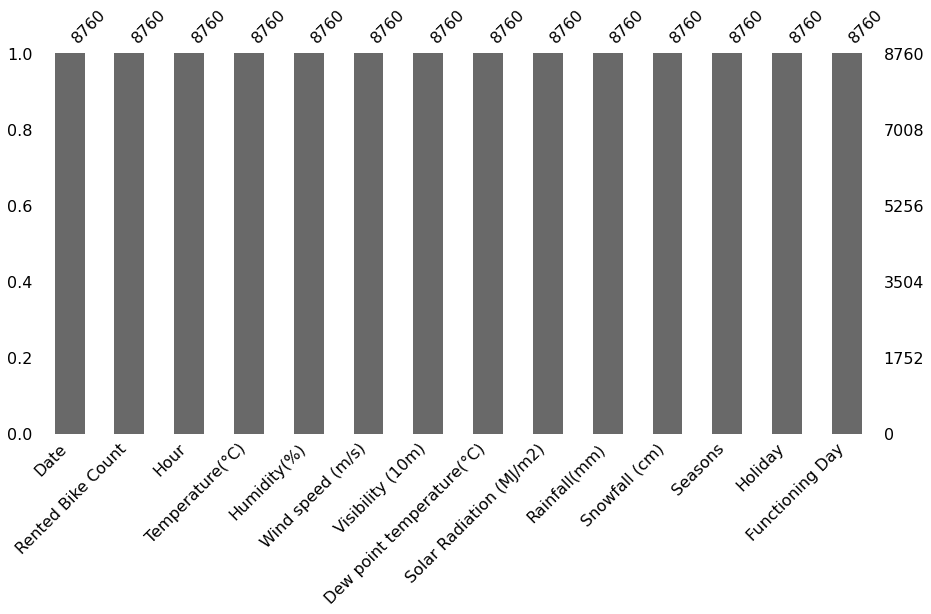

In [10]:
# plotting for null values
msno.bar(dataset, figsize = (15,7))

### *Looks like there are no null values present in the data..*

### <b>Descriptive Stats ---

In [11]:
# descriptive statistics
dataset.describe(percentiles=[.1, .9])

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
10%,64.000000,2.000000,-3.700000,32.000000,0.600000,436.900000,-15.300000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
90%,1671.100000,21.000000,28.000000,86.000000,3.200000,2000.000000,21.000000,2.051000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### *Looks like we will be needing to do some normalizations to our data since different columns are on different scales..*

### <b>Checking for duplicate values in the data..</b>

In [12]:
# duplicate
len(dataset[dataset.duplicated()])

0

### *No duplicate values found in the data...*

# <b>*EDA & Data Preprocessing* ----

### <b>Exploratory Data Analysis(EDA)</b>
### What is EDA? Exploratory Data Analysis: this is unavoidable and one of the major step to fine-tune the given data set(s) in a different form of analysis to understand the insights of the key characteristics of various entities of the data set like column(s), row(s) by applying Pandas, NumPy, Statistical Methods, and Data visualization packages.

In [13]:
# making a copy of the original dataset 
df = dataset.copy()

### *Changing the column names* ---

In [14]:
df.columns = ['Date',	'Rented_bike_count', 'hour',	'temperature',	'humidity',	'wind_speed',	'visibility',	'dew_point_temperature',	'solar_radiation',	'rainfall',	'snowfall',	'seasons',	'holiday',	'functioning_day']

In [15]:
df.head()

,Date,Rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [16]:
# checking for unique values in each column
df.nunique()

Date                      365
Rented_bike_count        2166
hour                       24
temperature               546
humidity                   90
wind_speed                 65
visibility               1789
dew_point_temperature     556
solar_radiation           345
rainfall                   61
snowfall                   51
seasons                     4
holiday                     2
functioning_day             2
dtype: int64

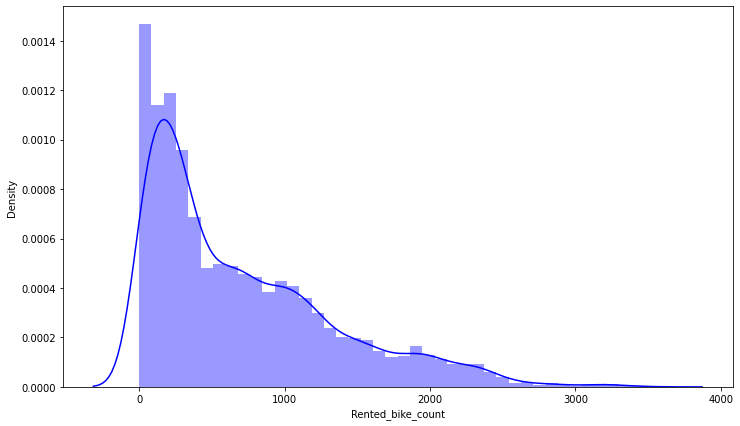

In [17]:
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(12,7))
sns.distplot(df['Rented_bike_count'],color="b")

*Dependent variable has right skewness*

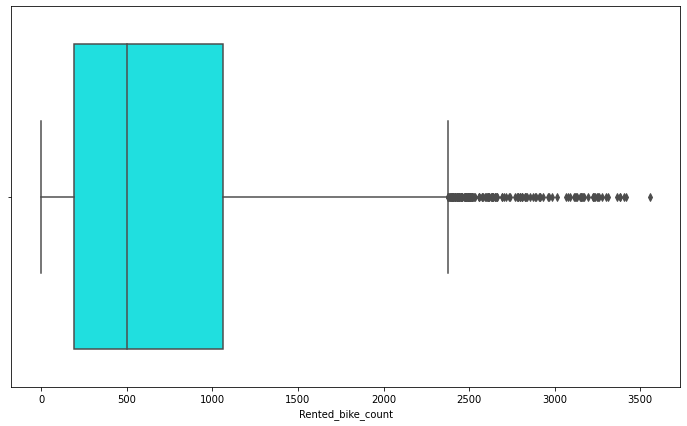

In [18]:
# plotting a boxplot
plt.figure(figsize=(12,7))
sns.boxplot(df['Rented_bike_count'], color= 'cyan')

*Many Outliers are present...*

*Since, this values can actually be real values, we cannot drop them..*

### <b> Transformation </b>
<b>square-root for moderate skew:</b>
sqrt(x) for positively skewed data,
sqrt(max(x+1) - x) for negatively skewed data

<b>log for greater skew:</b>
log10(x) for positively skewed data,
log10(max(x+1) - x) for negatively skewed data

<b>inverse for severe skew:</b>
1/x for positively skewed data
1/(max(x+1) - x) for negatively skewed data

<b>Linearity and heteroscedasticity:</b>
First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values
If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

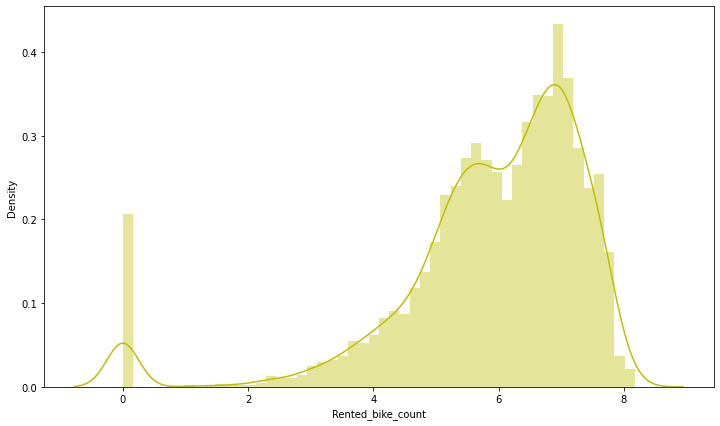

In [19]:
# Dependent variable 'Rented Bike Count' after log transformation
plt.figure(figsize=(12,7))
sns.distplot(np.log1p(df['Rented_bike_count']),color="y")

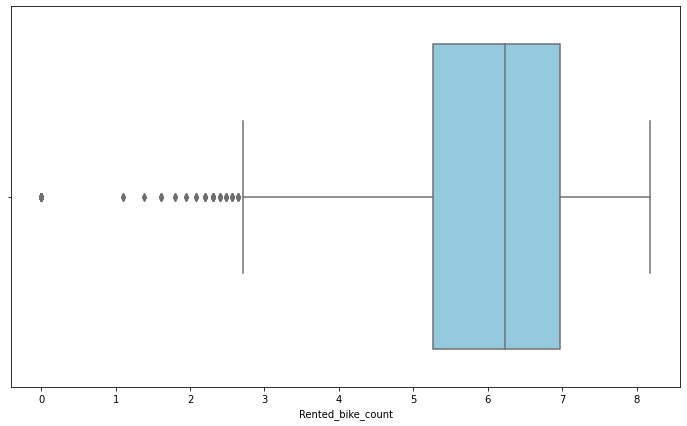

In [20]:
# plotting a boxplot
plt.figure(figsize=(12,7))
sns.boxplot(np.log1p(df['Rented_bike_count']), color = 'skyblue')

*Even after a log transformation, it seems to be negatively skewed... but we can work with them, and also the outliers can be genuine values...*

### *'Date' column values are converted to datetime format from object type..So that we can further work on this column...*

In [21]:
# 'Date' column datatype is changed to datetime format from object type
df['Date'] =  pd.to_datetime(df['Date'], infer_datetime_format=True)

In [22]:
df['Date'][195:300]

195   2017-09-12
196   2017-09-12
197   2017-09-12
198   2017-09-12
199   2017-09-12
         ...    
295   2017-12-13
296   2017-12-13
297   2017-12-13
298   2017-12-13
299   2017-12-13
Name: Date, Length: 105, dtype: datetime64[ns]

### <b>Creating a timeseries DataFrame and storing it for later when we shall be doing time-series analysis..

In [23]:
timeseries_data = df.loc[:, ['Date', 'Rented_bike_count']]

timeseries_data.head()

,Date,Rented_bike_count
0,2017-01-12,254
1,2017-01-12,204
2,2017-01-12,173
3,2017-01-12,107
4,2017-01-12,78


### <b> *Creating new columns day, date, month & year from 'Date' column...*

In [24]:
# extracting day of the week, date, month and year from the datetime column
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['date'] = df['Date'].dt.day
df['day'] = df['Date'].dt.day_name()

We don't need the original date column anymore. So, dropping the column..

In [25]:
# dropping the 'Date' column
df.drop('Date', inplace = True, axis = 1)

In [26]:
# checking the head
df.head()

,Rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,year,month,date,day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,Thursday


### *Using the 'day' column, we can create another column which will be containing value = 1 if the given day was 'Saturday', or 'Sunday'... And for the rest of the days of the week, the value will be 0*

### *Let's call this column 'weekend_days'...*

In [27]:
# creating new column called 'weekend_days' to assign value of '1' to Saturdays & Sundays and '0' for every other days
df['weekend_days'] = df['day'].apply(lambda x : 1 if x== 'Saturday' or x== 'Sunday' else 0)


# checking the value counts for weekend_days column
df['weekend_days'].value_counts()

0    6216
1    2544
Name: weekend_days, dtype: int64

### We are creating a class for feature encoding with different methods of encoding for various features...

In [28]:
class Encoder:

  def __init__(self, data):
    """Dataframe needs to be passed"""
    self.data = data


  def one_zero_encoder(self, existing_col, value):

    """ Inputs : column name(to check), column value(to check)
    Returns an encoded array """
    self.existing_col = existing_col
    self.value = value

    new_col = np.empty(shape = (1,0), dtype = int)    # empty numpy array to store the results

    for i in self.data[self.existing_col]:         # looping through the dataframe column values
      if i == self.value:
      # checking for matching values 
        new_col = np.append( new_col, 1 ) #assigning value of 1 for a match
      else:
        new_col = np.append( new_col, 0 ) #assigning value 0 for bo match

    return new_col




  # def time_mapper(self, col):

  #   """ Inputs : hour column,
  #   Bins the hours based on criteria and
  #   Returns an array with the appropiate time of day"""
  #   self.col = col

  #   time_of_day = np.empty(shape = (1,0), dtype = int)    # empty numpy array to store the results

  #   for i in self.data[self.col]:         # looping through the dataframe column values
      
  #     if (23 <= i <= 4):
  #       time_of_day = np.append( time_of_day, 'night_time' ) # for midnight to 4 am
  #     elif (5 <= i <= 8):
  #       time_of_day = np.append( time_of_day, 'morning' ) # for 5 am to 8 am
  #     elif (9 <= i <= 12):
  #       time_of_day = np.append( time_of_day, 'day_time' ) # for 9 pm to 12 pm
  #     elif (13 <= i <= 17):
  #       time_of_day = np.append( time_of_day, 'afternoon' ) # for 1 pm to 5 pm
  #     else:
  #       time_of_day = np.append( time_of_day, 'evening' ) # for 6 pm to 10 pm

  #   return time_of_day




  # def Quarter(self, month_val):

  #   """ Inputs : month column,
  #   Bins the month based on criteria and
  #   Returns an array with the appropiate quarter"""
  #   self.month_val = month_val

  #   q = np.empty(shape = (1,0), dtype = int)    # empty numpy array to store the results

  #   for i in self.data[self.month_val]:         # looping through the dataframe column values

  #     if (1 <= i <= 3):
  #       q = np.append( q, 'q1' ) # for Jan-March(1-3)
  #     elif (4 <= i <= 6):
  #       q = np.append( q, 'q2' ) # for April-June(4-6)
  #     elif (7 <= i <= 9):
  #       q = np.append( q, 'q3' ) # for July-Sep(7-9)
  #     else:
  #       q = np.append( q, 'q4' ) # for Oct-Dec(10-12)

  #   return q

### *For Holiday column ---*

In [29]:
# value counts for 'Holiday' column
df['holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: holiday, dtype: int64

In [30]:
obj = Encoder(df)

In [31]:
# using self defined function, assigning value of '1' for holidays and '0' for no holidays
hday = obj.one_zero_encoder('holiday', 'Holiday')

df['holiday'] = hday.tolist()  

In [32]:
# checking the value count after trandformation
df['holiday'].value_counts()

0    8328
1     432
Name: holiday, dtype: int64

### *For 'Functioning Day' column ---*

In [33]:
# value counts for 'Functioning Day' column

df['functioning_day'].value_counts()

Yes    8465
No      295
Name: functioning_day, dtype: int64

In [34]:
# assigning value of '1' to functioning days and '0' to not functioning days
func_day = obj.one_zero_encoder('functioning_day', 'Yes')

df['functioning_day'] = func_day.tolist()  

In [35]:
# value counts for 'Functioning Day' column after transformation

df['functioning_day'].value_counts()

1    8465
0     295
Name: functioning_day, dtype: int64

### *Checking the Season column ---*

In [36]:
# value counts for 'Seasons' column
df['seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: seasons, dtype: int64

*Season column has 4 unique values which are four different seasons... So, we shall need to do one hot encoding...*

*We shall do that later...*

### *'Year' and 'day' variables are not going to be needed anymore.. So, we will be dropping them...*

In [37]:
df.drop('day', inplace= True, axis = 1)
df.drop('year', inplace= True, axis = 1)

In [38]:
df.nunique()

Rented_bike_count        2166
hour                       24
temperature               546
humidity                   90
wind_speed                 65
visibility               1789
dew_point_temperature     556
solar_radiation           345
rainfall                   61
snowfall                   51
seasons                     4
holiday                     2
functioning_day             2
month                      12
date                       31
weekend_days                2
dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_bike_count      8760 non-null   int64  
 1   hour                   8760 non-null   int64  
 2   temperature            8760 non-null   float64
 3   humidity               8760 non-null   int64  
 4   wind_speed             8760 non-null   float64
 5   visibility             8760 non-null   int64  
 6   dew_point_temperature  8760 non-null   float64
 7   solar_radiation        8760 non-null   float64
 8   rainfall               8760 non-null   float64
 9   snowfall               8760 non-null   float64
 10  seasons                8760 non-null   object 
 11  holiday                8760 non-null   int64  
 12  functioning_day        8760 non-null   int64  
 13  month                  8760 non-null   int64  
 14  date                   8760 non-null   int64  
 15  week

### Variables like **Hour** , **Seasons** , **Holiday**,  **Functioning Day**, **Month**, **date** and **weekend_days** should be categorical in nature raher than numerical or object type. So, we shall omit them when checking the distributions for numerical variables...

In [40]:
# changing the data type
cols = ['hour', 'seasons', 'holiday', 'functioning_day', 'month', 'date', 'weekend_days']
for col in cols:
  df[col] = df[col].astype('category')

In [41]:
# declaring numeric features 
numeric_features = df.describe().columns

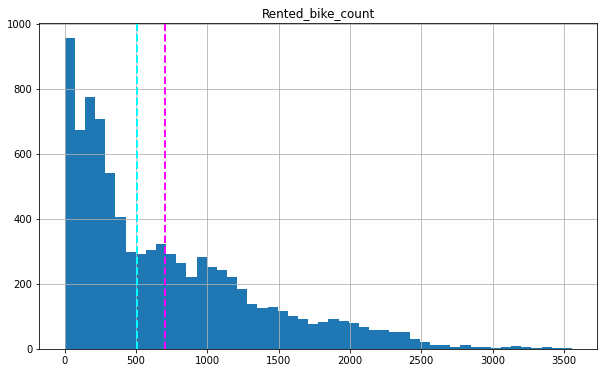

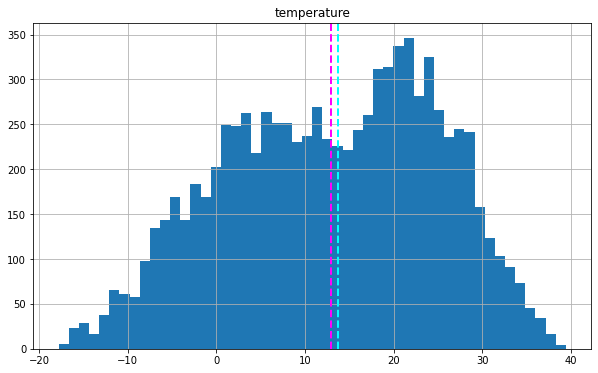

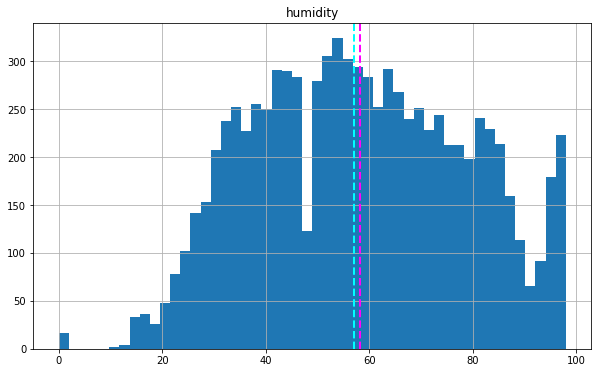

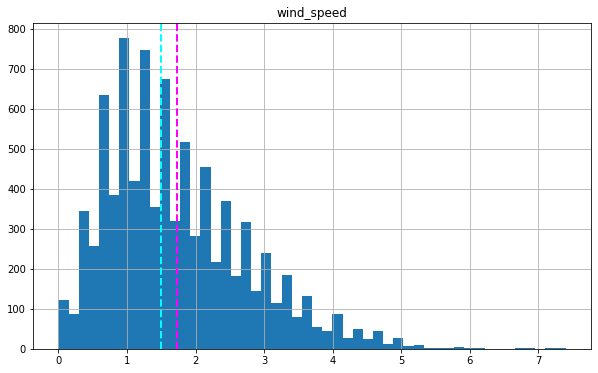

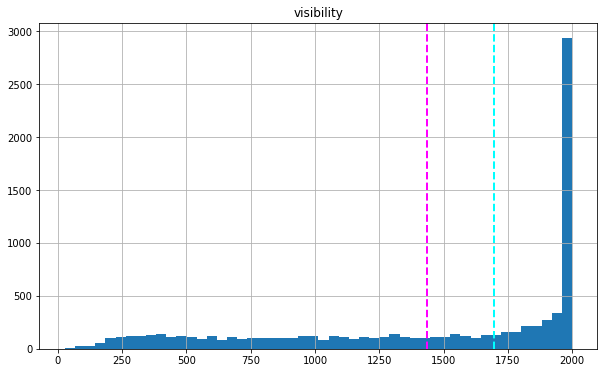

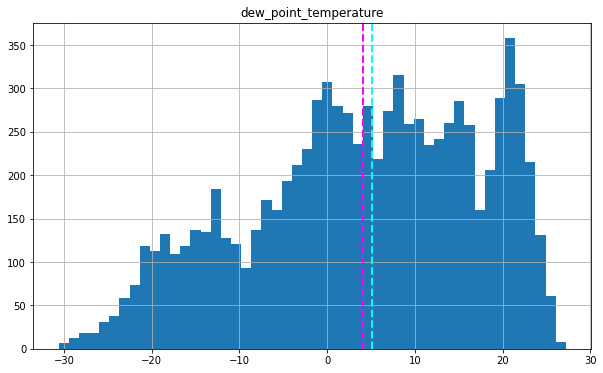

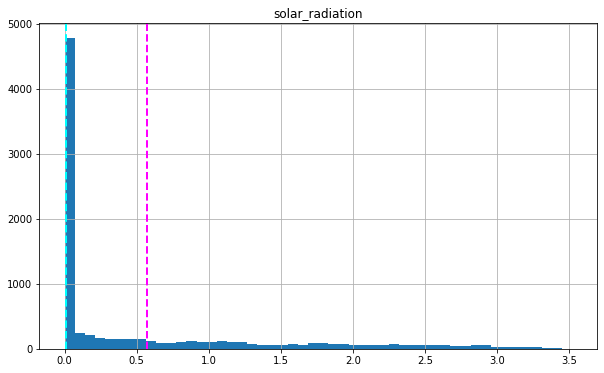

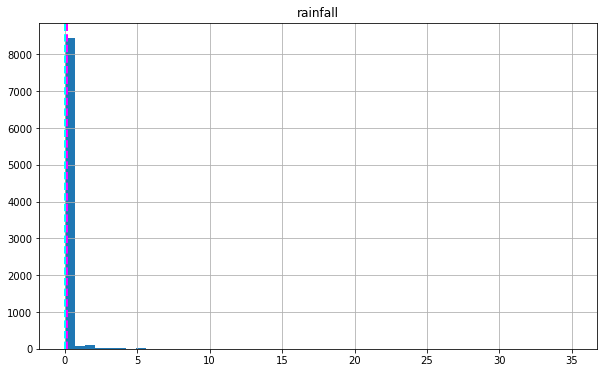

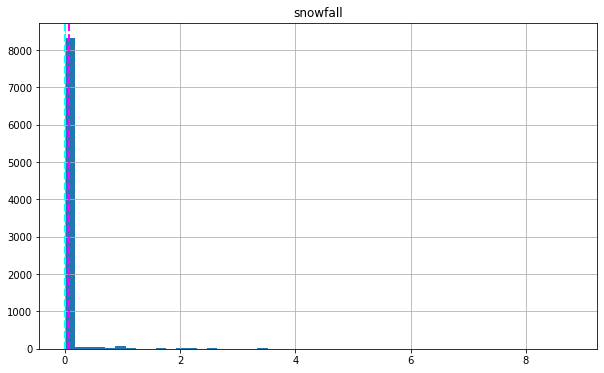

In [42]:
# plotting histogram
for col in numeric_features[:]:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

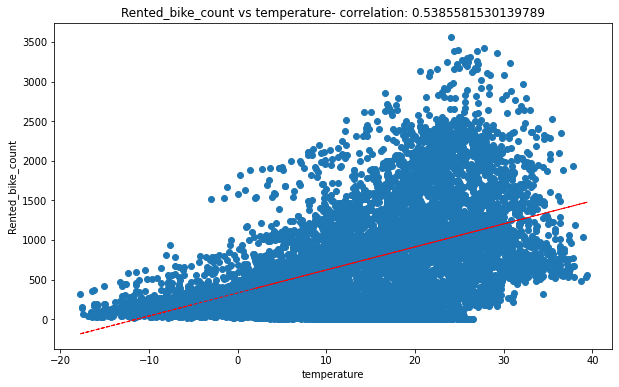

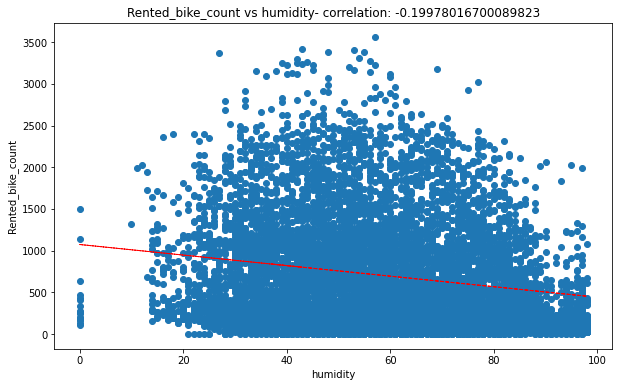

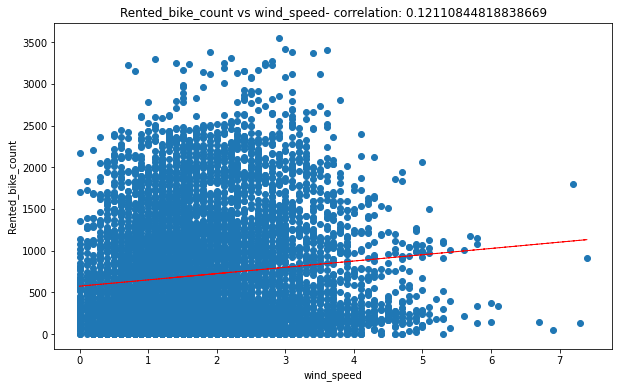

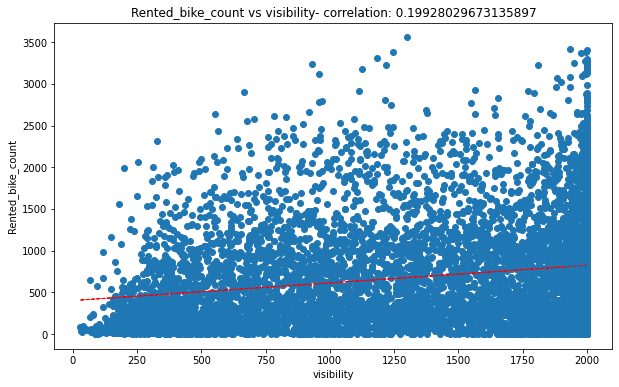

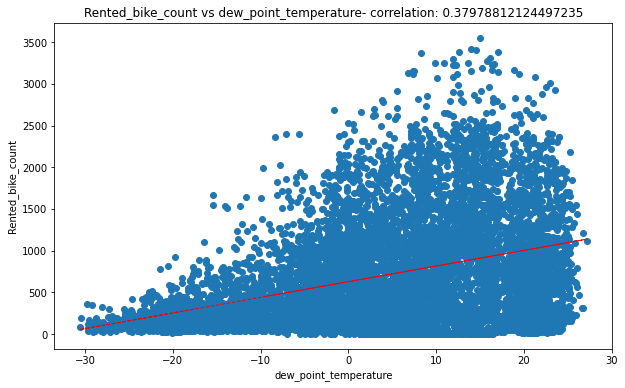

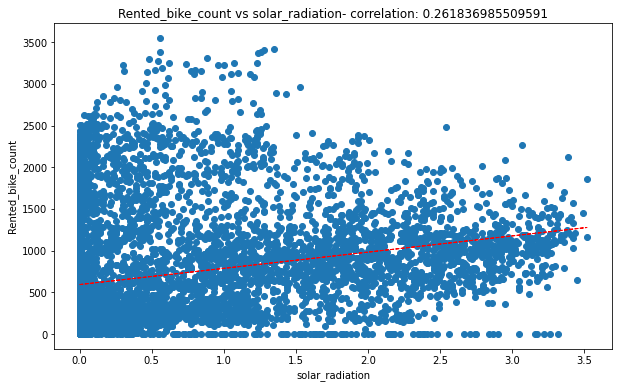

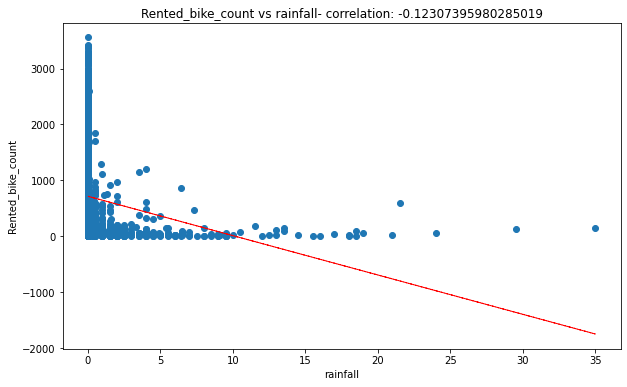

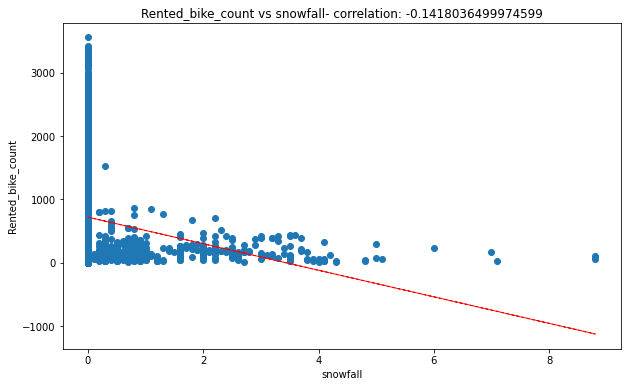

In [43]:
# correlation
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Rented_bike_count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented_bike_count')
    ax.set_title('Rented_bike_count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Rented_bike_count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

*   ### *'Snowfall' and 'Rainfall' have negative correlation with our dependent variable 'Rented Bike Count'.*

*   ### *All the other variables have somewhat of a positive correlation.*

*   ### *'Temperature' has the highest positive correlation with bike count. The value of correlation is approx 0.538*






### <b>*Correlation Matrix*</b>

In [44]:
# coorelation
correlation = df.corr()
correlation

,Rented_bike_count,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall
Rented_bike_count,1.000000,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
temperature,0.538558,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
humidity,-0.199780,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
wind_speed,0.121108,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
visibility,0.199280,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
dew_point_temperature,0.379788,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
solar_radiation,0.261837,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
rainfall,-0.123074,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
snowfall,-0.141804,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


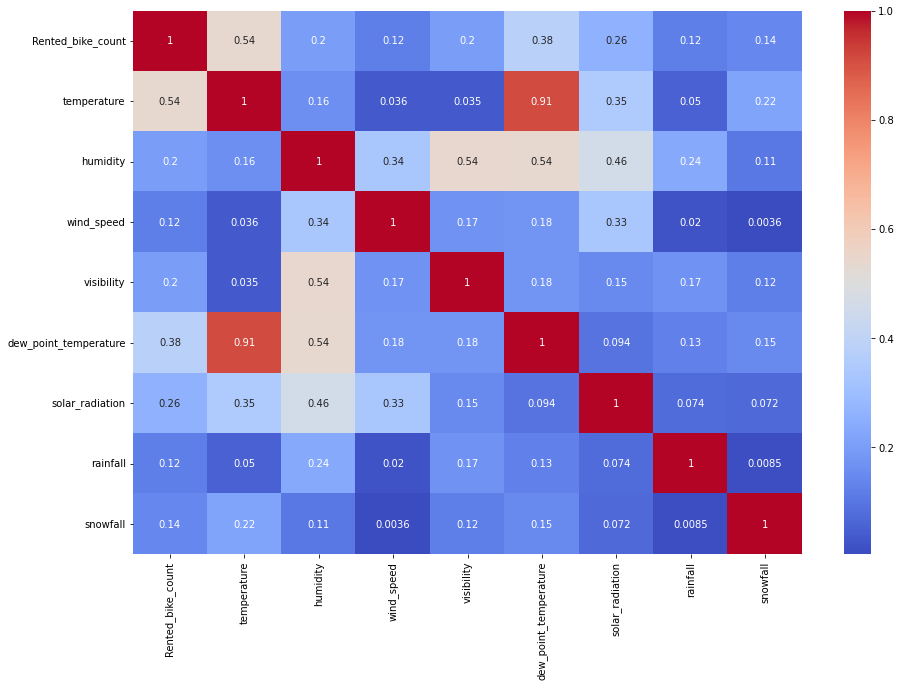

In [45]:
## Correlation heatmap
plt.figure(figsize=(15,10))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

### <b>*It seems that 'Dew point temperature(°C)' and 'Temperature(°C) has a correlation of 0.91*

### *It would be better to drop one of these columns... Since, 'Dew point temperature(°C)' has a smaller correlation value(0.38) with our dependant variable 'Rented Bike Count' compared to 'Temperature' column, which has a correlation value of 0.54, we shall be dropping the 'Dew point temperature(°C)' column to remove multicollinearity....*</b>

### *Also, the 'date' column will not be much useful in our regression model.. So, we are dropping that as well...*

In [46]:
# dropping the 'date' column
df.drop('date', inplace = True, axis = 1)
df.drop('dew_point_temperature', inplace = True, axis = 1)

In [47]:
df.head()

,Rented_bike_count,hour,temperature,humidity,wind_speed,visibility,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,month,weekend_days
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,0,1,1,0
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,0,1,1,0
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,0,1,1,0
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,0,1,1,0
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,0,1,1,0


## <b>*Visualization---*

### <b>Rented Bike vs Hour ---

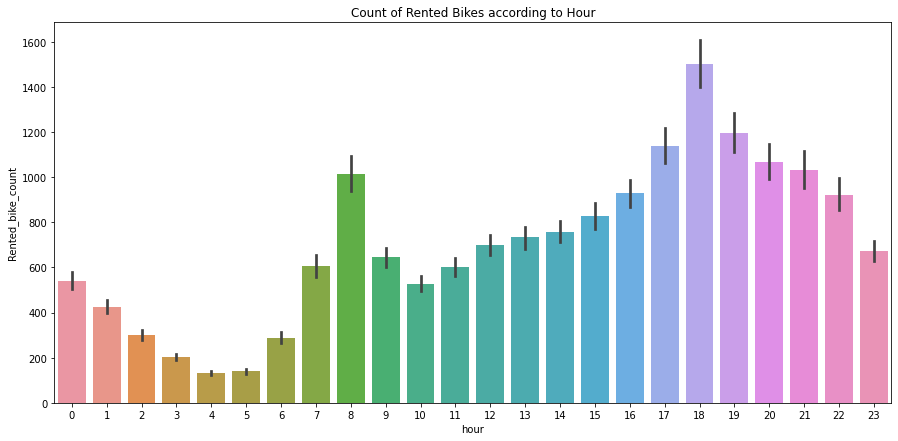

In [48]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x = 'hour' , y = 'Rented_bike_count', data = df)
ax.set_title('Count of Rented Bikes according to Hour')
plt.show()

### Around 8am in the morning, and around 5-8 pm in the evening, we have the spike in the the bike renting.

### 18th hour, that is around 6pm, most of the bikes have been rented.. This is probably because many of the office workers returning from their shift like to rent bikes as their means of transport..

### Checking the hourly bike rent with respect to weekend days will give us a better understanding of the situation..

### <b>Rented Bike vs Hour wrt Weekends---

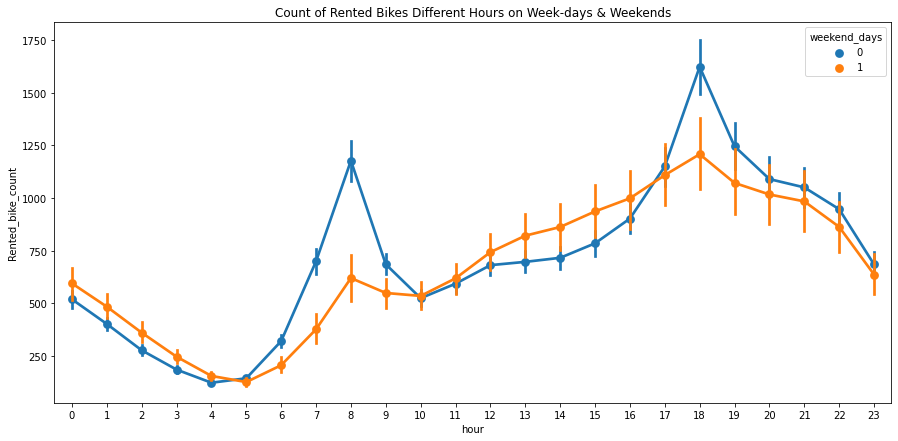

In [49]:
plt.figure(figsize=(15,7))
ax = sns.pointplot(x = 'hour' , y = 'Rented_bike_count', data = df, hue = 'weekend_days')
ax.set_title("Count of Rented Bikes Different Hours on Week-days & Weekends")
plt.show()

### Although, the count of bikes rented on weekends are much lesser, interestingly enough, we are seeing the same pattern on weekends as well as regular days..

### Around 6 pm in the evening, the count of bikes rented goes up the most on both weekends and on regular days..

### <b>Effect of Functioning Day on hourly bike rentals ---</b>

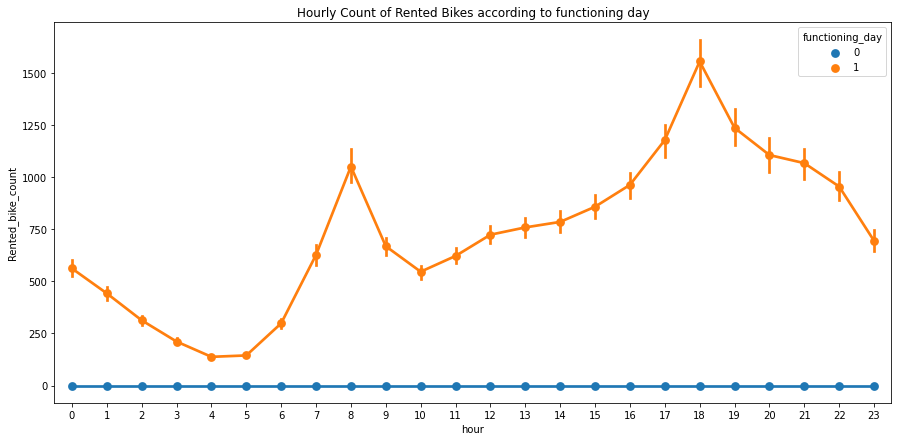

In [50]:
plt.figure(figsize=(15,7))
ax = sns.pointplot(x = 'hour' , y = 'Rented_bike_count', data = df, hue = 'functioning_day')
ax.set_title("Hourly Count of Rented Bikes according to functioning day")
plt.show()

### No bikes are being rented on non-functioning days..

### <b>*Bike Rented vs Month* ---

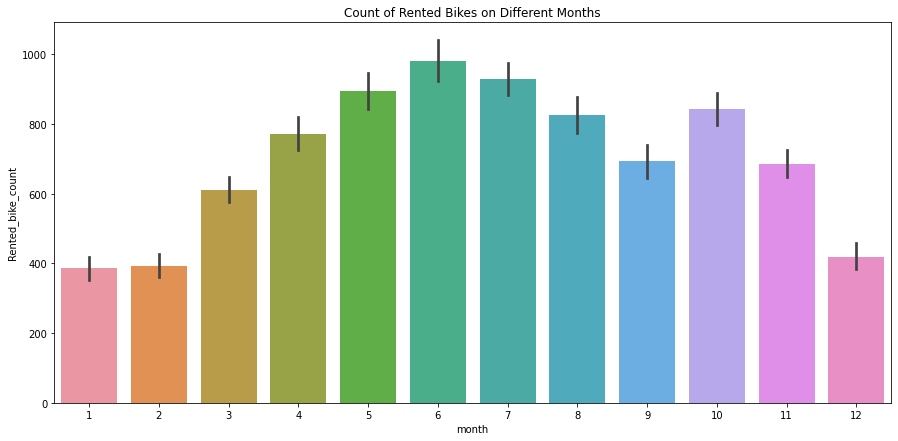

In [51]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x = 'month' , y = 'Rented_bike_count', data = df)
ax.set_title('Count of Rented Bikes on Different Months')
plt.show()

### Months of January, February and December have the lowest number of bike rents of all twelve months..
### Let's check te holiday effect..

### <b>*Rented Bike Count vs Holidays* ---

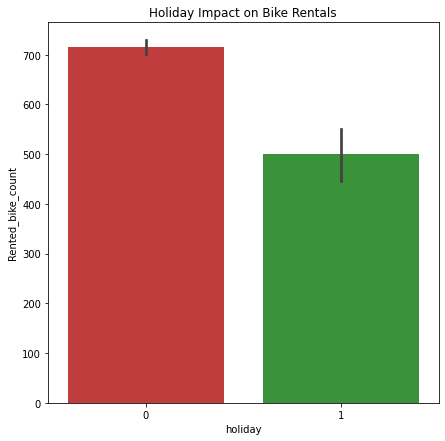

In [52]:
plt.figure(figsize=(7,7))
ax = sns.barplot(x = 'holiday' , y = 'Rented_bike_count', data = df, palette = ['tab:red', 'tab:green'])
ax.set_title('Holiday Impact on Bike Rentals')
plt.show()

### On Holidays, we have lesser bikes rented compared to non-holidays..
### Now, let's check how holidays play a role throughout the months..

### <b>*How Holidays effected rented bikes each month* ---

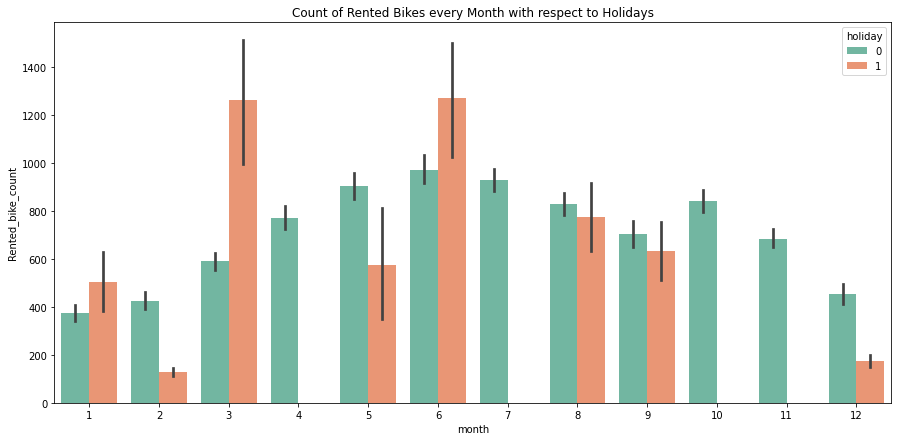

In [53]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x = 'month' , y = 'Rented_bike_count', data = df , hue = 'holiday', palette = 'Set2')
ax.set_title('Count of Rented Bikes every Month with respect to Holidays')
plt.show()

### Only in the months of January, March and June, there were more bikes rented on holidays than working days.. Guess people love to go to vacations on these months and many like to rent bikes for this...

### <b>*Bike rented each Month depending on whether it was an Weekend* ---

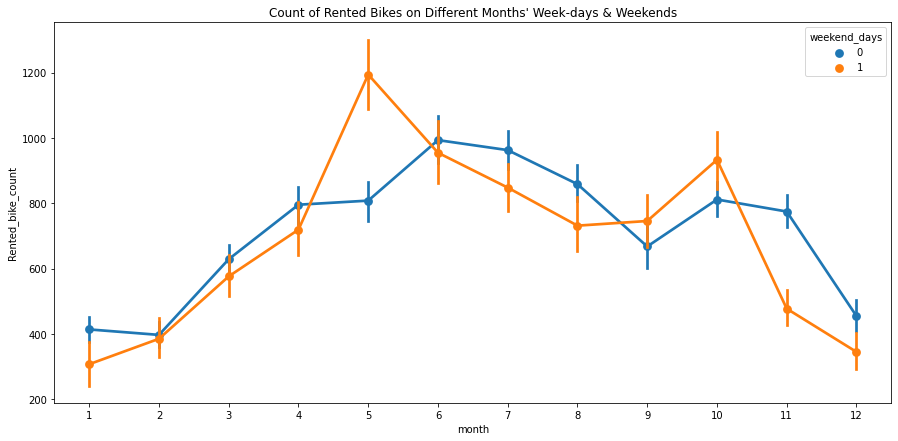

In [54]:
plt.figure(figsize=(15,7))
ax = sns.pointplot(x = 'month' , y = 'Rented_bike_count', data = df, hue = 'weekend_days')
ax.set_title("Count of Rented Bikes on Different Months' Week-days & Weekends")
plt.show()

### <b>*Seasonal effect on Rented Bike Counts* ---

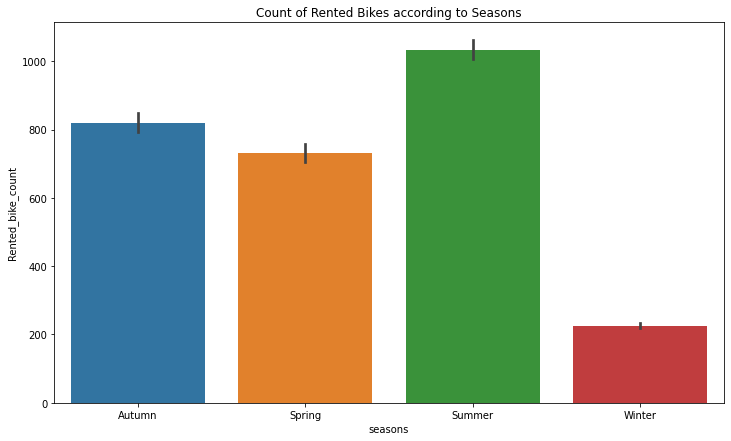

In [55]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x = 'seasons' , y = 'Rented_bike_count', data = df)
ax.set_title('Count of Rented Bikes according to Seasons')
plt.show()

### Winter is the least favourite season for people to rent bikes...

### Let's see how the hourly count is affected based on different seasons...

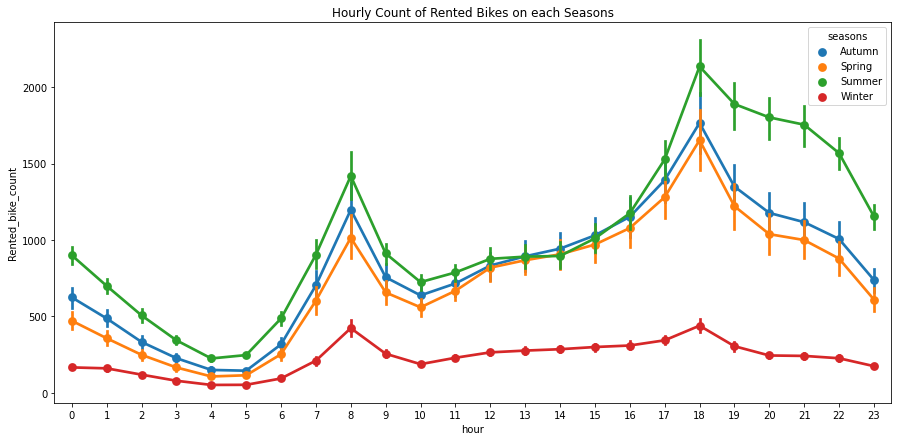

In [56]:
plt.figure(figsize=(15,7))
ax = sns.pointplot(x = 'hour' , y = 'Rented_bike_count', data = df, hue = 'seasons')
ax.set_title("Hourly Count of Rented Bikes on each Seasons")
plt.show()

### <b>*Seasonal effect on Bike count according to Holidays ---*

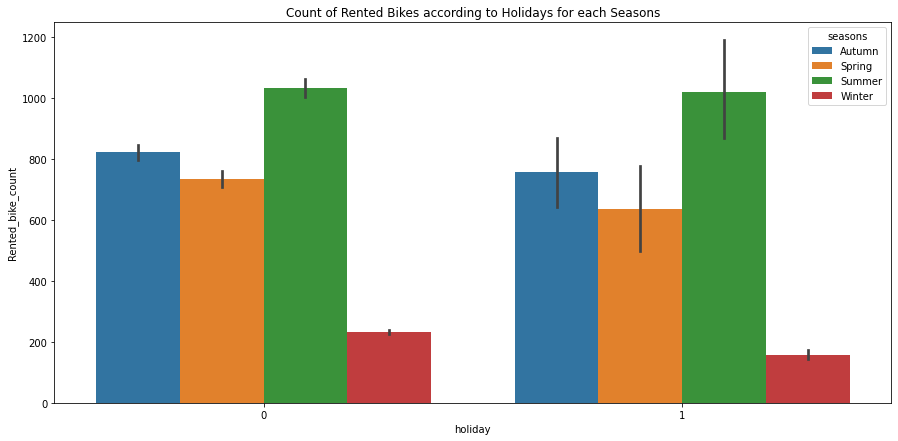

In [57]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x = 'holiday' , y = 'Rented_bike_count', data = df , hue = 'seasons')
ax.set_title('Count of Rented Bikes according to Holidays for each Seasons')
plt.show()

### Holidays or non-holidays doesn't make much of a difference on bikes rentals in different seasons.. The distribution remains the same more or less...

### <b>*Rented Bike Count vs Snowfall ---*

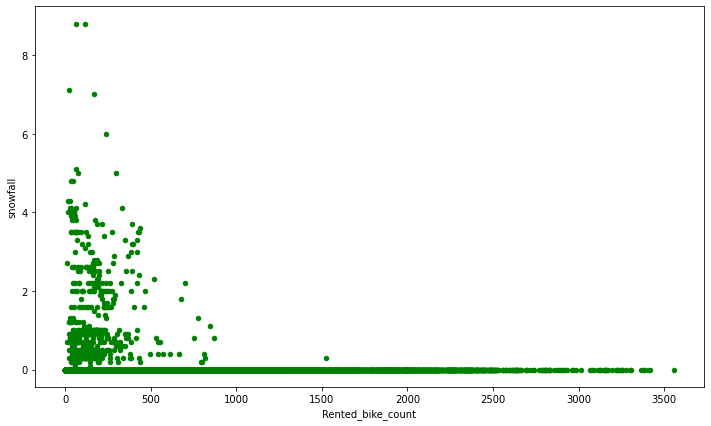

In [58]:
# plt.figure(figsize=(15,7))
df.plot.scatter(x = 'Rented_bike_count', y = 'snowfall', color='g', marker='o', figsize=(12,7))
plt.show()

### Snowfall is not good for business at all...

### <b>*Rented Bike vs Rainfall ---*

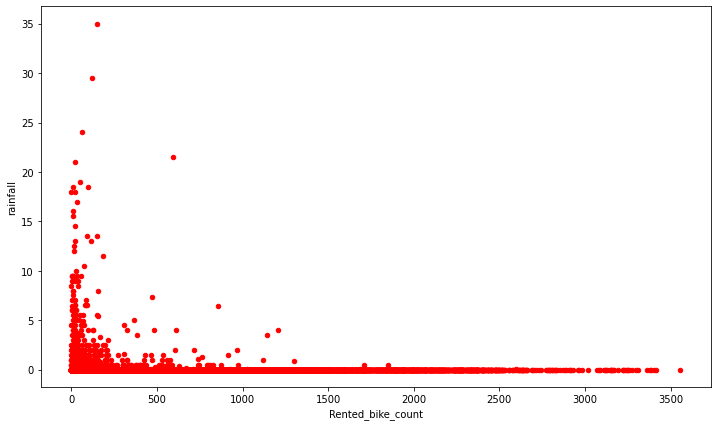

In [59]:
df.plot.scatter(x = 'Rented_bike_count', y = 'rainfall', color='r', marker='o', figsize=(12,7))
plt.show()

### Rainfall is also negatively affecting the number of bike rents..